---
title: "Sampling from Distributions, Bar Plots, Histograms and Scatter plots"
author: "Karthik Thiagarajan"
---

## Import and Settings

We will import `NumPy` and `matplotlib`. In addition, we will also start with some customised layout for the plot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Random Number Generator

A random number generator allows us to generate "pseudo random numbers". These aren't truly random, but come close enough for all practical purposes. `NumPy` has a `random` module that helps us define such a generator:

In [3]:
rng = np.random.default_rng(seed=42)

The seed value ensures that our simulations are reproducible. Run the following code multiple times with and without a seed value and notice the behaviour.

In [19]:
rng = np.random.default_rng(seed=42)
rng.integers(0, 10, 5)

array([0, 7, 6, 4, 4])

Let us quickly look at sampling from a uniform distribution.

`rng.integers(a, b, endpoint=True, size=n)` returns a sample of $n$ integers in the interval $[a, b]$ drawn from the discrete uniform distribution.

In [50]:
rng.integers(0, 5,
             endpoint=True,
             size=50
)

array([5, 2, 3, 5, 5, 0, 2, 2, 5, 3, 2, 1, 4, 2, 5, 0, 1, 3, 1, 3, 3, 1,
       2, 4, 3, 3, 2, 2, 0, 1, 2, 3, 3, 5, 1, 2, 4, 1, 3, 5, 1, 5, 1, 5,
       3, 3, 1, 2, 5, 2])

To sample from the continuous uniform distribution $U[a, b]$, we run:

In [53]:
rng.uniform(0, 1,
            size=50)

array([0.98796486, 0.76410381, 0.10498714, 0.03107057, 0.93128712,
       0.96552035, 0.21928765, 0.44180262, 0.55841242, 0.26566918,
       0.05186467, 0.34936711, 0.26823169, 0.51232861, 0.47317588,
       0.31202876, 0.42502523, 0.4537047 , 0.99292336, 0.63649573,
       0.40598673, 0.62687924, 0.09587909, 0.19025823, 0.57653219,
       0.65941569, 0.82635908, 0.05680779, 0.79063923, 0.18256108,
       0.06228407, 0.11270523, 0.81318061, 0.62981147, 0.46985742,
       0.08367527, 0.95083251, 0.68161831, 0.47453638, 0.85001569,
       0.17413239, 0.08551654, 0.06614779, 0.63247482, 0.48444714,
       0.9989611 , 0.05181891, 0.0821462 , 0.23662616, 0.52679687])

## Sampling and Plotting

Armed with a pseudo random number generator, we shall try to sample points from various probability distributions. Once we have a sample, we can then represent it pictorially using suitable plots.

### Sampling: Bernoulli

Let us generate a sample of $1000$ points from the $\text{Br}(0.7)$. Recall that this is the same as tossing a biased coin $1000$ times, which has $P(H) = 0.7$.

In `NumPy`:

In [23]:
X = rng.choice(
    [0, 1],
    p=[0.3, 0.7],
    size=1000)
X.shape

(1000,)

### Plotting: Bar plot

Let us visualise the sample using a bar plot. For this, we first need the height of the bars or the frequencies.

Counter({np.int64(1): 690, np.int64(0): 310})


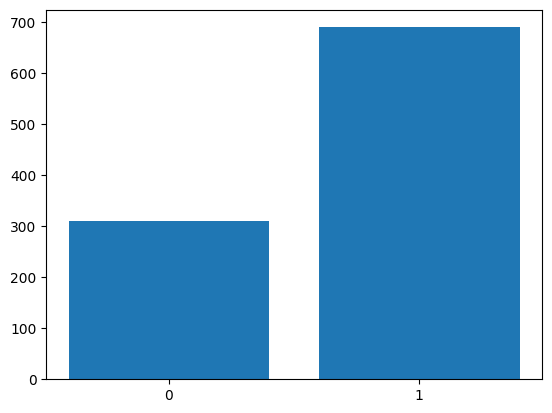

In [29]:
from collections import Counter
freq = Counter(X)
print(freq)
plt.bar([0, 1], [freq[0], freq[1]])
plt.xticks([0, 1]);

The `xticks` method ensures appropriate labeling of the bars on the x-axis.

### Sampling: Gaussian

We now generate a sample of $10,000$ points from $\mathcal{N}(50, 4)$. Recall that $\mu = 1$ and $\sigma^2 = 4$. As a concrete example, we could use a normal distribution to model the heights or weights of people in a room, or the marks of students in an exam.

In [31]:
X = rng.normal(50, 2,
               size=10_000)
X.shape

(10000,)

### Plotting: Histogram

We can now visualise the sample using a histogram.

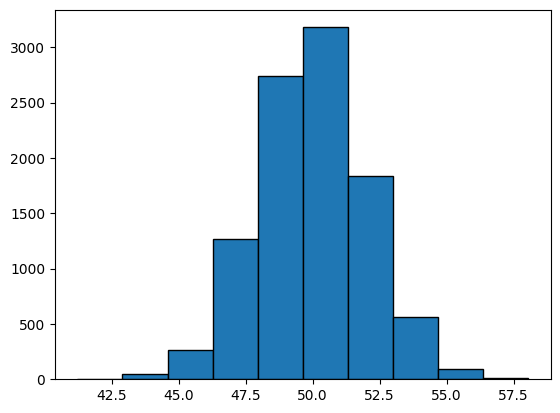

In [32]:
plt.hist(X,
         bins=10,
         edgecolor='black');

### Sampling: Bivariate Gaussian

Let us now sample $1000$ points from the following Bivariate Gaussian:

$$
\mathcal{N} \left( \begin{bmatrix}1 \\ 2\end{bmatrix}, \begin{bmatrix}1 & 0\\0 & 5\end{bmatrix} \right)
$$

As a concrete example, a Bivariate Gaussian could model the distribution of the landing positions of balls on a cricket pitch in a given cricekt match.

In [34]:
mu = np.array([1, 2])
cov = np.array([
    [1, 0],
    [0, 5]
])
X = rng.multivariate_normal(
    mu,
    cov,
    size=1000).T
# we transpose so that the data-matrix is (d, n) and not (n, d)
d, n = X.shape

### Plotting: Scatter plot

Let us now visualise the sample using a scatter plot. Zooming out of the scatter plot gives us a better understanding. Changing the covariance matrix also helps in understanding how the sampled points depend on it.

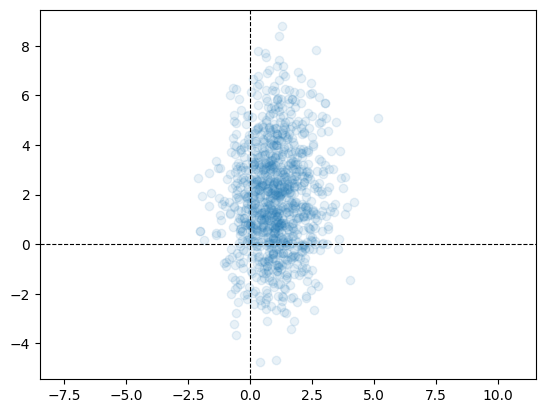

In [40]:
plt.scatter(X[0], X[1],
            alpha=0.1)
plt.axis('equal')
plt.axhline(color='black',
            linestyle='--',
            linewidth='0.8')
plt.axvline(color='black',
            linestyle='--',
            linewidth='0.8');

`alpha` allows us to control the transparency of points in a scatter plot. By default `alpha=1`, indicating complete opacity.

## GMM

We can now combine the concepts learnt above to sample points from a Gaussian Mixture Model. We shall draw $1,000,000$ samples from a Gaussian Mixture Model (GMM) that has three components, with mixture probabilities $[0.2, 0.3, 0.5]$ and means $[10, 15, 18]$. The standard deviation of all three Gaussians is the same and is equal to $1$. We can visualise the sample using a histogram.

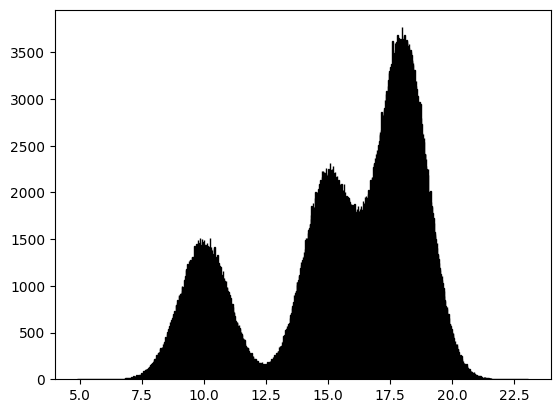

In [47]:
n = 1_000_000
comp = rng.choice(
    [0, 1, 2],
    p=[0.2, 0.3, 0.5],
    size=n)
mu = np.array([10, 15, 18])
X = np.zeros(n)
for i in range(n):
    X[i] = rng.normal(mu[comp[i]], 1)
plt.hist(X,
         bins=1000,
         edgecolor='black');

A concrete example of a GMM would be in modeling the incomes of a people in a  population in which there are distinct economic categories. Consider three groups whose salaries are distributed normally around means 10 lpa, 15 lpa and 18 lpa, with unit variance. The three groups are represented in the proportion $2 : 3 : 5$. We could model the distribution of the income of an individual from this population as a GMM. The above plot would be the histogram of a sample from this population.